This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and the magnitude ($G$, $G_{BP}$, and $G_{RP}$).

- $\rho$ vs $G$ and $X$ vs $G$

This note differs `radio-to-optical-offset-vs-magnitude` by using all the common sources between ICRF3 and Gaia-CRF2 at three bands.

In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# My progs
from CorrTest import NWSmooth, new_corr_test

In [2]:
# Gaia EDR3 photometric information
from my_progs.catalog.read_gaia import read_edr3_icrf_sou
gedr3 = read_edr3_icrf_sou()

gedr3.keep_columns([
    "iers_name", "source_id", "phot_g_mean_mag", "phot_bp_mean_mag",
    "phot_rp_mean_mag"
])

gedr3.rename_columns(
    ["phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag"],
    ["g_mag", "bp_mag", "rp_mag"])

# r2o = join(r2o, gedr3, keys="iers_name", table_names=["", "g"])

In [3]:
# VLBI-Gaia offset
sx_gaia_offset = Table.read("../data/icrf3sx_gedr3_all_combined.fits")
sx_gaia_offset.keep_columns(["iers_name", "ang_sep_cor", "pa_cor", "nor_sep_cor"])

k_gaia_offset = Table.read("../data/icrf3k_gedr3_all_combined.fits")
k_gaia_offset.keep_columns(["iers_name", "ang_sep_cor", "pa_cor", "nor_sep_cor"])

xka_gaia_offset = Table.read("../data/icrf3xka_gedr3_all_combined.fits")
xka_gaia_offset.keep_columns(["iers_name", "ang_sep_cor", "pa_cor", "nor_sep_cor"])

In [4]:
# Cross-match
# SX-Gaia vs. G-mag
sx2g = join(sx_gaia_offset, gedr3, keys="iers_name")
sx2g.keep_columns(["ang_sep_cor", "nor_sep_cor", "g_mag"])
print("Find G-mag for {:d} SX sources ({:d} in all)".format(len(sx2g), len(sx_gaia_offset)))

# K-Gaia vs. G-mag
k2g = join(k_gaia_offset, gedr3, keys="iers_name")
k2g.keep_columns(["ang_sep_cor", "nor_sep_cor", "g_mag"])
print("Find G-mag for {:d} K sources ({:d} in all)".format(len(k2g), len(k_gaia_offset)))

# XKa-Gaia vs. G-mag
ka2g = join(xka_gaia_offset, gedr3, keys="iers_name")
ka2g.keep_columns(["ang_sep_cor", "nor_sep_cor", "g_mag"])
print("Find X-band structure index for {:d} XKa sources ({:d} in all)".format(len(ka2g), len(xka_gaia_offset)))

Find G-mag for 3142 SX sources (3142 in all)
Find G-mag for 660 K sources (660 in all)
Find X-band structure index for 576 XKa sources (576 in all)


# 1 angular separation $\rho$ vs. magnitude

## 2.1 $\rho$ and $X$ (SX) vs. $G $

In [5]:
keys = "g_mag"
sx2g.sort(keys)

x = np.array(sx2g[keys])
y_ang = np.array(sx2g["ang_sep_cor"])
y_nor = np.array(sx2g["nor_sep_cor"])

nw_ang_sx = NWSmooth(x, y_ang)
nw_nor_sx = NWSmooth(x, y_nor)

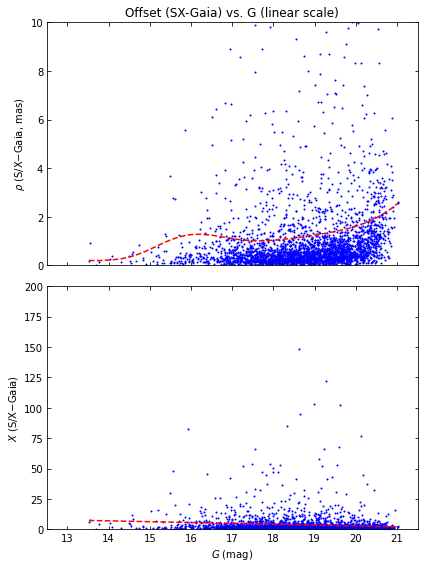

In [6]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(x, y_ang, "b.", ms=2)
ax1.plot(x, y_nor, ".b", ms=2)

# Smoothed data
ax0.plot(x, nw_ang_sx, "r--")
ax1.plot(x, nw_nor_sx, "r--")

ax0.set_xlim([12.5, 21.5])
ax0.set_ylim([0, 10])
ax1.set_ylim([0, 200])

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$X$ (S/X$-$Gaia)")
ax1.set_xlabel("$G$ (mag)")

ax0.set_title("Offset (SX-Gaia) vs. G (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

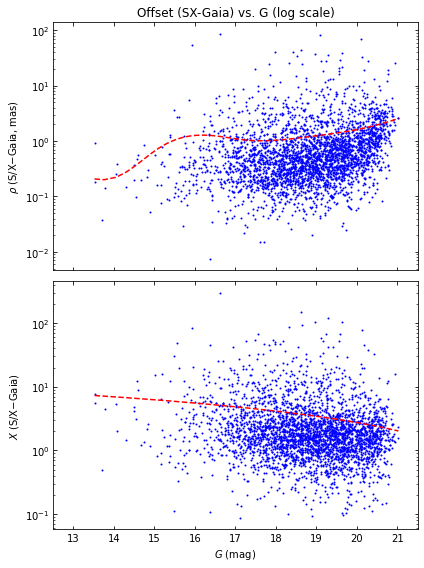

In [7]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(x, y_ang, "b.", ms=2)
ax1.plot(x, y_nor, ".b", ms=2)

# Smoothed data
ax0.plot(x, nw_ang_sx, "r--")
ax1.plot(x, nw_nor_sx, "r--")

ax0.set_xlim([12.5, 21.5])
ax0.set_yscale("log")
ax1.set_yscale("log")

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$X$ (S/X$-$Gaia)")
ax1.set_xlabel("$G$ (mag)")

ax0.set_title("Offset (SX-Gaia) vs. G (log scale)")

plt.subplots_adjust()
plt.tight_layout()

In [8]:
new_corr_test(x, [y_ang, y_nor], [nw_ang_sx, nw_nor_sx],
              obj_name="SX vs. Gaia",
              ylabel=["rho", "X"])

SX vs. Gaia
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
rho         +6.5e-02   2.6e-04  +3.1e-01   4.2e-71  +2.1e-01   3.9e-72
X           -9.3e-02   1.7e-07  -1.5e-01   2.1e-16  -9.7e-02   4.2e-16
-----------------------------------------------------------------
Smoothed
rho         +8.2e-01   0.0e+00  +9.0e-01   0.0e+00  +8.3e-01   0.0e+00
X           -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00   0.0e+00
-----------------------------------------------------------------


## 2.2 $\rho$ and $X$ (K) vs. $G$

In [9]:
keys = "g_mag"
k2g.sort(keys)

x = np.array(k2g[keys])
y_ang = np.array(k2g["ang_sep_cor"])
y_nor = np.array(k2g["nor_sep_cor"])

nw_ang_k = NWSmooth(x, y_ang)
nw_nor_k = NWSmooth(x, y_nor)

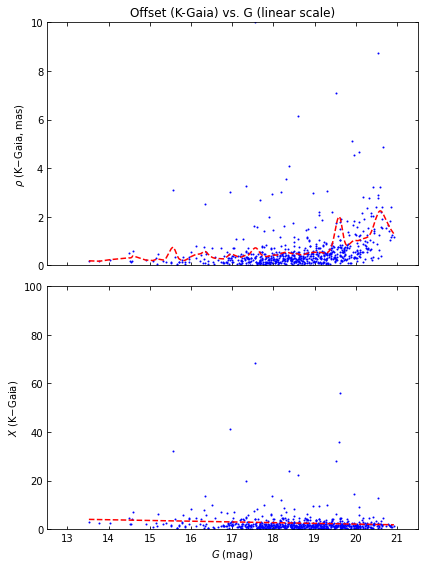

In [10]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(x, y_ang, "b.", ms=2)
ax1.plot(x, y_nor, ".b", ms=2)

# Smoothed data
ax0.plot(x, nw_ang_k, "r--")
ax1.plot(x, nw_nor_k, "r--")

ax0.set_xlim([12.5, 21.5])
ax0.set_ylim([0, 10])
ax1.set_ylim([0, 100])

ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_ylabel("$X$ (K$-$Gaia)")
ax1.set_xlabel("$G$ (mag)")

ax0.set_title("Offset (K-Gaia) vs. G (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

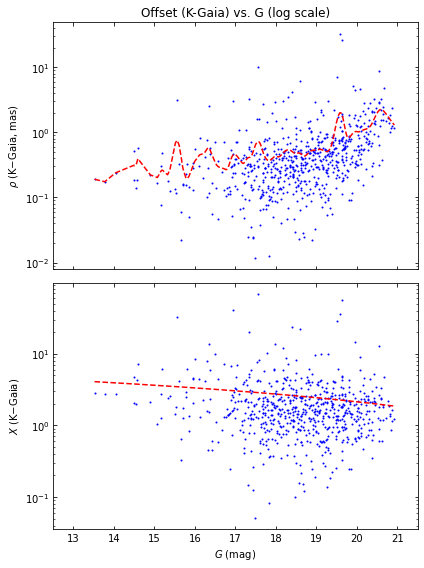

In [11]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(x, y_ang, "b.", ms=2)
ax1.plot(x, y_nor, ".b", ms=2)

# Smoothed data
ax0.plot(x, nw_ang_k, "r--")
ax1.plot(x, nw_nor_k, "r--")

ax0.set_xlim([12.5, 21.5])

ax0.set_yscale("log")
ax1.set_yscale("log")

ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_ylabel("$X$ (K$-$Gaia)")
ax1.set_xlabel("$G$ (mag)")

ax0.set_title("Offset (K-Gaia) vs. G (log scale)")

plt.subplots_adjust()
plt.tight_layout()

In [12]:
new_corr_test(x, [y_ang, y_nor], [nw_ang_k, nw_nor_k],
              obj_name="K vs. Gaia",
              ylabel=["rho", "X"])

K vs. Gaia
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
rho         +1.7e-01   9.4e-06  +4.6e-01   4.5e-35  +3.2e-01   5.2e-34
X           -8.1e-02   3.8e-02  -9.1e-02   1.9e-02  -6.0e-02   2.1e-02
-----------------------------------------------------------------
Smoothed
rho         +6.8e-01   9.0e-90  +8.2e-01  3.3e-160  +6.5e-01  6.7e-137
X           -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00   0.0e+00
-----------------------------------------------------------------


## 2.3 $\rho$ and $X$ (XKa) vs. $G$

In [13]:
keys = "g_mag"
ka2g.sort(keys)

x = np.array(ka2g[keys])
y_ang = np.array(ka2g["ang_sep_cor"])
y_nor = np.array(ka2g["nor_sep_cor"])

nw_ang_xka = NWSmooth(x, y_ang)
nw_nor_xka = NWSmooth(x, y_nor)

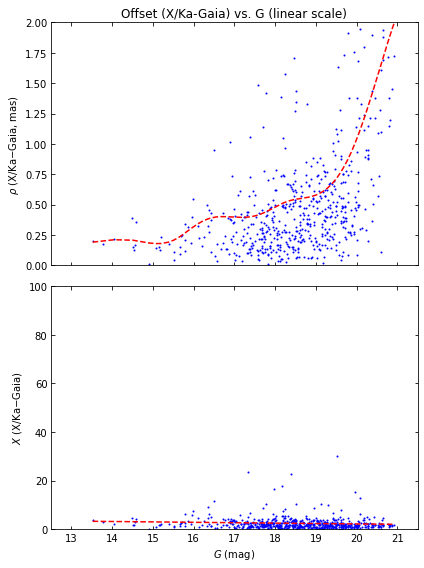

In [14]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(x, y_ang, "b.", ms=2)
ax1.plot(x, y_nor, ".b", ms=2)

# Smoothed data
ax0.plot(x, nw_ang_xka, "r--")
ax1.plot(x, nw_nor_xka, "r--")

ax0.set_xlim([12.5, 21.5])
ax0.set_ylim([0, 2])
ax1.set_ylim([0, 100])

ax0.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax1.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax1.set_xlabel("$G$ (mag)")

ax0.set_title("Offset (X/Ka-Gaia) vs. G (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

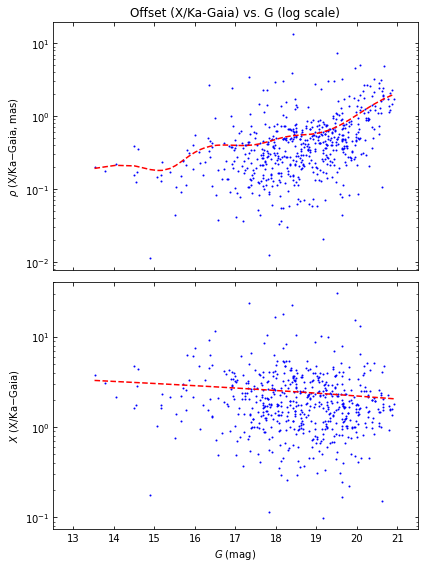

In [15]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(x, y_ang, "b.", ms=2)
ax1.plot(x, y_nor, ".b", ms=2)

# Smoothed data
ax0.plot(x, nw_ang_xka, "r--")
ax1.plot(x, nw_nor_xka, "r--")

ax0.set_xlim([12.5, 21.5])
ax0.set_yscale("log")
ax1.set_yscale("log")

ax0.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax1.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax1.set_xlabel("$G$ (mag)")

ax0.set_title("Offset (X/Ka-Gaia) vs. G (log scale)")

plt.subplots_adjust()
plt.tight_layout()

In [16]:
new_corr_test(x, [y_ang, y_nor], [nw_ang_xka, nw_nor_xka],
              obj_name="X/Ka vs. Gaia",
              ylabel=["rho", "X"])

X/Ka vs. Gaia
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
rho         +2.8e-01   8.9e-12  +4.7e-01   2.3e-32  +3.3e-01   1.7e-31
X           -8.3e-02   4.8e-02  -1.4e-01   1.0e-03  -9.1e-02   1.2e-03
-----------------------------------------------------------------
Smoothed
rho         +8.1e-01  5.8e-138  +1.0e+00   0.0e+00  +9.9e-01  7.3e-275
X           -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00   0.0e+00
-----------------------------------------------------------------
